In [2]:
%cd ../src

/Users/hiromimatsumoto/Library/CloudStorage/GoogleDrive-ocean.vntp@gmail.com/マイドライブ/キカガク長期コース/キカガク_アプリ制作/LSGAN-app/src


In [3]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
from generator import Generator
from discriminator import Discriminator
import psutil

In [4]:
!pwd

/Users/hiromimatsumoto/Library/CloudStorage/GoogleDrive-ocean.vntp@gmail.com/マイドライブ/キカガク長期コース/キカガク_アプリ制作/LSGAN-app/src


In [19]:
pre_mem = psutil.virtual_memory()
G = Generator()
G.load_state_dict(torch.load('netG_epoch_541.pth', map_location='cpu'))

D = Discriminator()
D.load_state_dict(torch.load('netD_epoch_541.pth', map_location='cpu'))

<All keys matched successfully>

In [20]:
imgs = []
memorys = []
for _ in tqdm(range(1)):
    noise = torch.randn(1, 100, 1, 1)
    img = G(noise)
    img.shape
    imarray = img.squeeze(0).detach().numpy().transpose(1, 2, 0)
    prob = D(img).sigmoid().item()
    
    if prob >= 0.6:
        imgs.append(imarray)
    
    # if len(imgs) > 3:
    #     break
    post_mem = psutil.virtual_memory()
    memorys.append(post_mem.used)
    
    

100%|██████████| 1/1 [00:00<00:00, 34.70it/s]


In [21]:
import numpy as np
max_mem = np.array(memorys).max()
pre_mem = pre_mem.used

In [22]:
diff = (max_mem - pre_mem)
diff / 1000 / 1000


37.961728

In [9]:
imgs, probs = [], []
for _ in tqdm(range(20000)):
    noise = torch.randn(1, 100, 1, 1)
    img = G(noise)
    img.shape
    imarray = img.squeeze(0).detach().numpy().transpose(1, 2, 0)
    prob = D(img).sigmoid().item()
    probs.append(prob)

100%|██████████| 20000/20000 [02:30<00:00, 133.20it/s]


(array([6.000e-03, 3.400e-02, 2.520e-01, 1.070e+00, 3.274e+00, 6.368e+00,
        8.842e+00, 8.584e+00, 6.136e+00, 3.334e+00, 1.400e+00, 5.040e-01,
        1.380e-01, 4.400e-02, 1.400e-02]),
 array([0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425, 0.45 , 0.475,
        0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ]),
 <BarContainer object of 15 artists>)

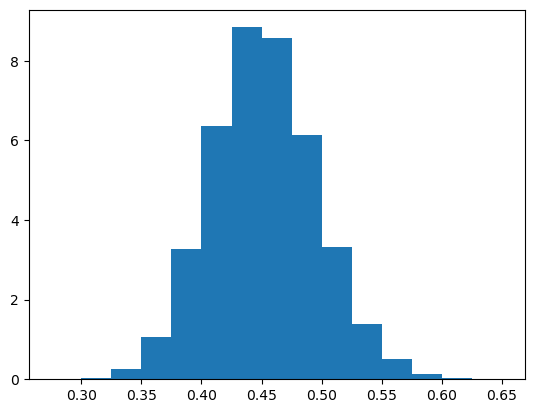

In [17]:
# 判定のヒストグラム作成
import numpy as np
start = 0.275
end = 0.65
step = 0.025
bin_list = [x for x in np.arange(start, end + step, step)]
plt.hist(probs, bins=bin_list, density=True)

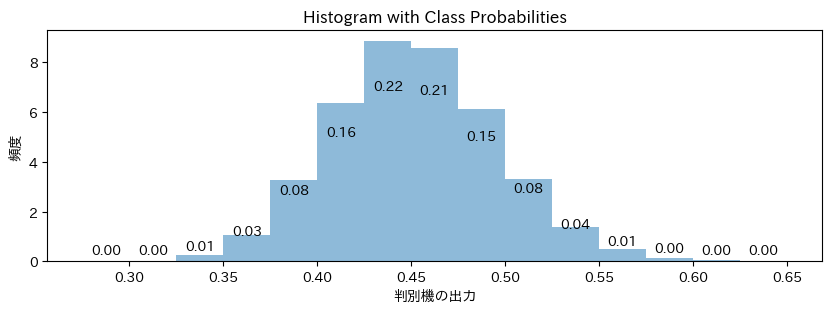

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
start = 0.275
end = 0.65
step = 0.025
bin_list = [x for x in np.arange(start, end + step, step)]

fig = plt.figure(figsize=(10, 3))
# ヒストグラムを作成
hist, bins, _ = plt.hist(probs, bins=bin_list, density=True, alpha=0.5)  # density=Trueで確率で正規化

# 階級ごとの確率を計算
bin_width = bins[1] - bins[0]
probabilities = hist * bin_width

# 階級ごとの確率を表示するためのテキストを配置
for i in range(len(bins) - 1):
    x = (bins[i] + bins[i + 1]) / 2
    y = 30 *(probabilities[i] + 0.005) # 適宜調整
    plt.text(x, y, f'{probabilities[i]:.2f}', ha='center', va='bottom')

plt.xlabel('判別機の出力')
plt.ylabel('頻度')
plt.title('Histogram with Class Probabilities')
plt.show()

In [12]:
(0.65 - 0.2)

0.9

In [53]:
len(imgs)

4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


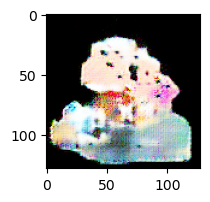

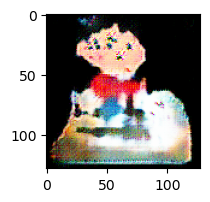

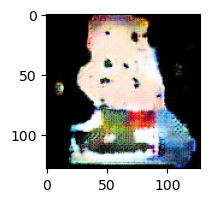

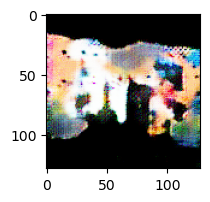

In [52]:
for img in imgs:
    plt.figure(figsize=(2, 2))
    plt.imshow(img)

In [62]:
imgs[0].max().dtype

dtype('float32')

In [66]:
import numpy as np
scaled_img = (imgs[0] + 1.0) * 127.5
uint8_value = np.round(scaled_img).astype('uint8')

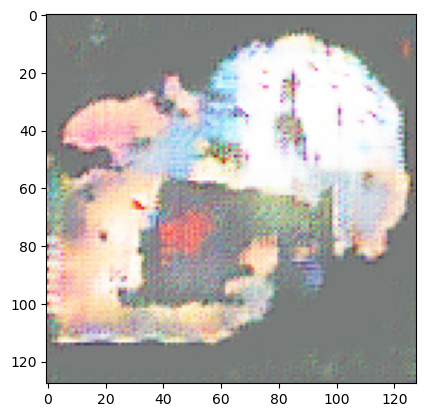

In [67]:
plt.imshow(uint8_value)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


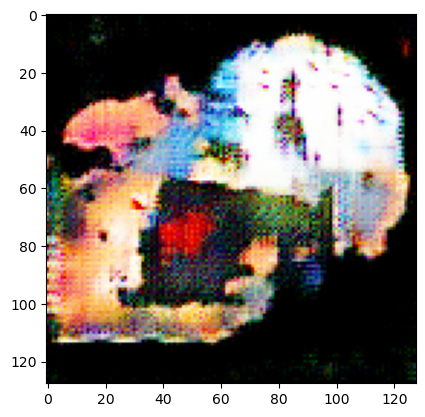

In [69]:
plt.imshow(imgs[0])

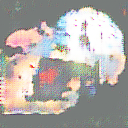

In [72]:
from PIL import Image
pilimg = Image.fromarray(uint8_value)
pilimg